In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, na_values="?", header=None)

# Define the headers
headers = [
    "symboling",
    "normalized-losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price",
]
df.columns = headers

# Display the first 5 rows of the dataframe
print("The first 5 rows of the dataframe:")
print(df.head())

/tmp/ipykernel_596723/3669393997.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].fillna(
/tmp/ipykernel_596723/3669393997.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

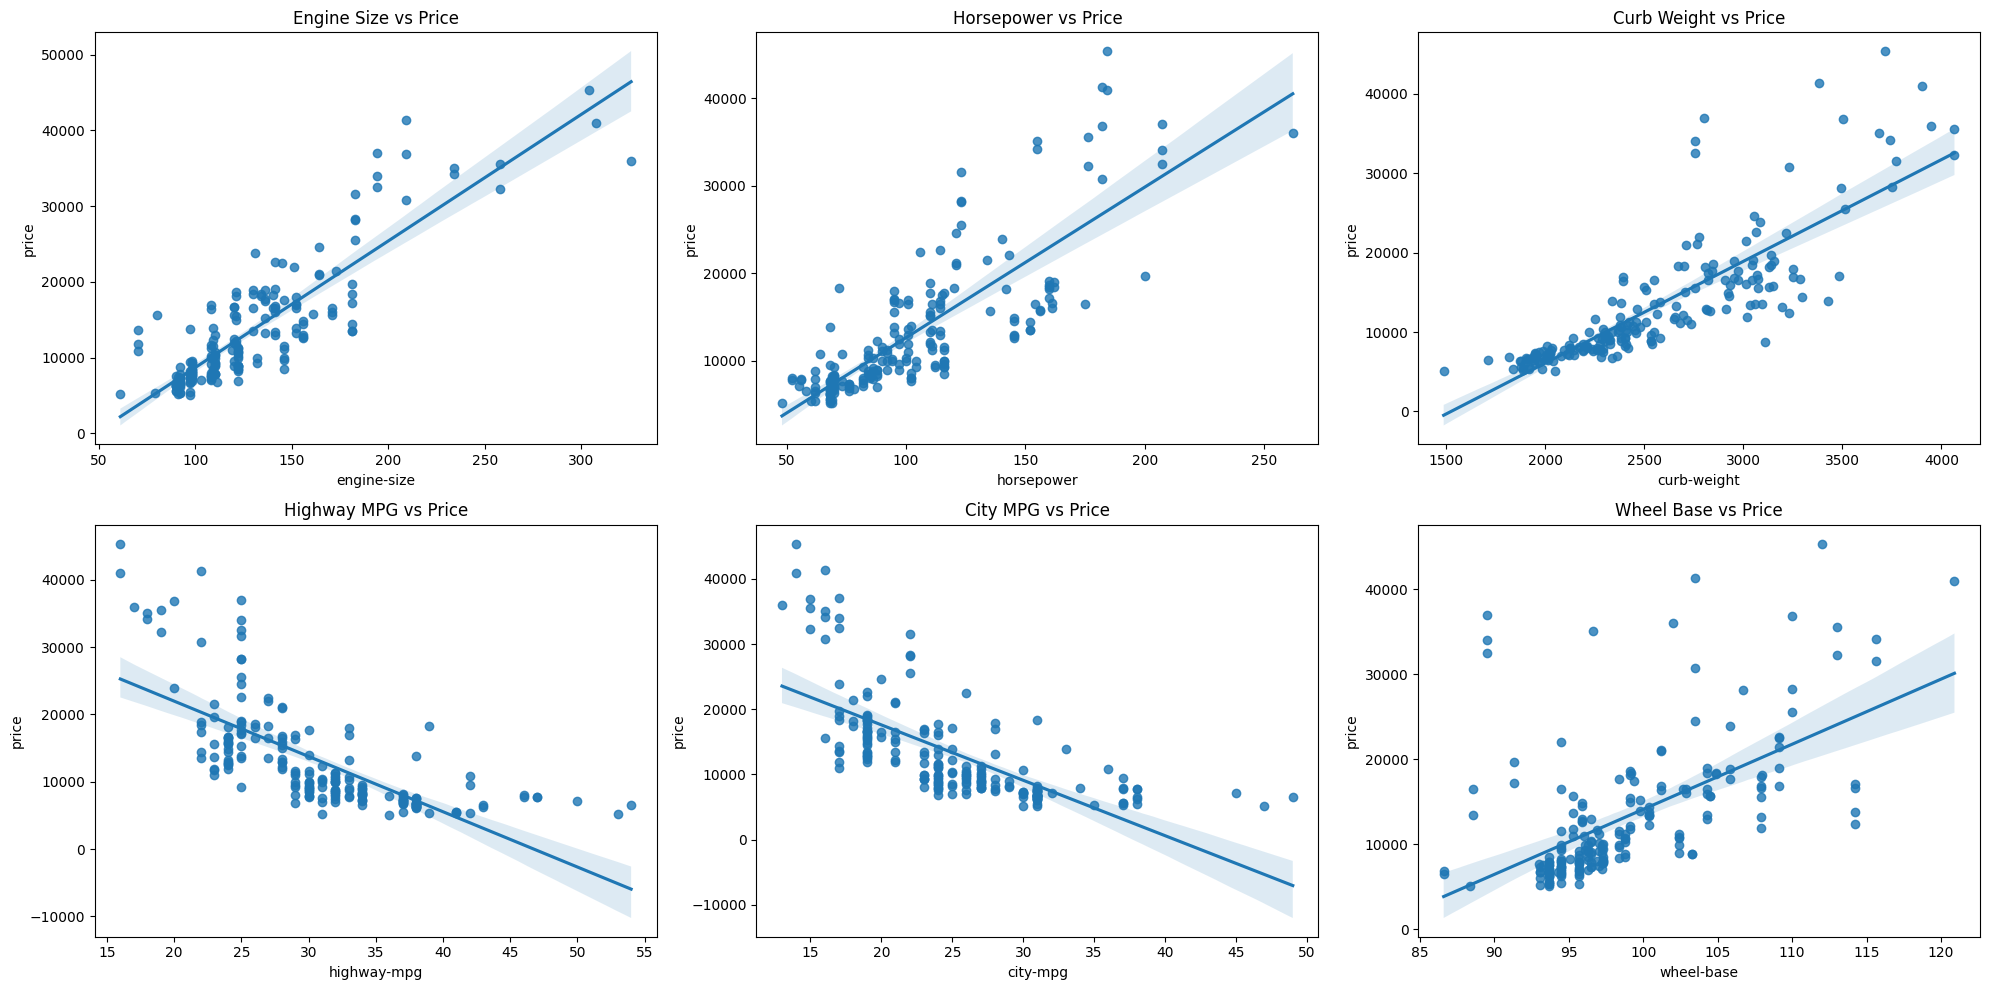

ValueError: Input y contains NaN.

In [2]:
# Preprocessing the data
# Replace missing values with the mean for numerical columns and the mode for categorical columns
df["normalized-losses"].fillna(
    df["normalized-losses"].astype("float").mean(), inplace=True
)
df["bore"].fillna(df["bore"].astype("float").mean(), inplace=True)
df["stroke"].fillna(df["stroke"].astype("float").mean(), inplace=True)
df["horsepower"].fillna(df["horsepower"].astype("float").mean(), inplace=True)
df["peak-rpm"].fillna(df["peak-rpm"].astype("float").mean(), inplace=True)
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0], inplace=True)
df["price"].dropna(inplace=True)

# Convert data types to appropriate formats
df["price"] = df["price"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")

# Data visualization
# Plot the effect of different features on the price
plt.figure(figsize=(20, 10))

# Visualize the effect of engine-size on price
plt.subplot(2, 3, 1)
sns.regplot(x="engine-size", y="price", data=df)
plt.title("Engine Size vs Price")

# Visualize the effect of horsepower on price
plt.subplot(2, 3, 2)
sns.regplot(x="horsepower", y="price", data=df)
plt.title("Horsepower vs Price")

# Visualize the effect of curb-weight on price
plt.subplot(2, 3, 3)
sns.regplot(x="curb-weight", y="price", data=df)
plt.title("Curb Weight vs Price")

# Visualize the effect of highway-mpg on price
plt.subplot(2, 3, 4)
sns.regplot(x="highway-mpg", y="price", data=df)
plt.title("Highway MPG vs Price")

# Visualize the effect of city-mpg on price
plt.subplot(2, 3, 5)
sns.regplot(x="city-mpg", y="price", data=df)
plt.title("City MPG vs Price")

# Visualize the effect of wheel-base on price
plt.subplot(2, 3, 6)
sns.regplot(x="wheel-base", y="price", data=df)
plt.title("Wheel Base vs Price")

plt.tight_layout()
plt.show()

# Identify the most influential features on price
# Define the feature set and target variable
features = df[
    [
        "engine-size",
        "horsepower",
        "curb-weight",
        "highway-mpg",
        "city-mpg",
        "wheel-base",
    ]
]
target = df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices
y_pred = model.predict(X_test)

# Calculate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, features.columns, columns=["Coefficient"])
print(coefficients)

# Identify the most influential features
print("Most influential features on price:")
print(coefficients.sort_values(by="Coefficient", ascending=False))